### Nytt försök med logistic regression på datasetet Iris
- target => numeriskt == dummie-encoding behövs inte

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Ladda Iris-dataset och dela upp i X och y
df = load_iris(as_frame=True).frame
X = df.drop(columns="target")
y = df["target"]

# Train/test-split (80/20, stratifierad)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Shapes:", X_train.shape, y_train.shape, X_test.shape, y_test.shape)


Shapes: (120, 4) (120,) (30, 4) (30,)


OBS! Här bör boxplot och heatmap ligga för att kolla outliers och/eller värden som inte bör ingå i modellen. 

##### Skala datan

In [4]:
from sklearn.preprocessing import StandardScaler

# Skapa scaler
scaler = StandardScaler()

# Fit + transform på train, bara transform på test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Före skalning (första raden):")
print(X_train.iloc[0].values)

print("\nEfter skalning (samma rad):")
print(X_train_scaled[0])


Före skalning (första raden):
[4.4 2.9 1.4 0.2]

Efter skalning (samma rad):
[-1.72156775 -0.33210111 -1.34572231 -1.32327558]


##### Logistic regression modell

In [5]:
from sklearn.linear_model import LogisticRegression
 
#Skapa modellen
model = LogisticRegression(
    multi_class= "multinomial",
    solver = "lbfgs",
    max_iter=200,
    random_state=42
)

#Träna på skalad träningsdata
model.fit(X_train_scaled, y_train)



c:\Users\susan\KodPython\ai_engineering_susanne_wenblad\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,200
,multi_class,'multinomial'


##### Logistic regression

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

# 1) Prediktioner på testdatan
y_pred_log = model.predict(X_test_scaled)

# 2) Accuracy
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Accuracy (Logistic Regression): {acc_log:.3f}")

# 3) Confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)
print("Confusion matrix (rader = sanna, kolumner = predikterade):")
print(cm_log)

# 4) Classification report
target_names = load_iris().target_names
print("\nClassification report:")
print(classification_report(y_test, y_pred_log, target_names=target_names))


Accuracy (Logistic Regression): 0.933
Confusion matrix (rader = sanna, kolumner = predikterade):
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



c:\Users\susan\KodPython\ai_engineering_susanne_wenblad\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


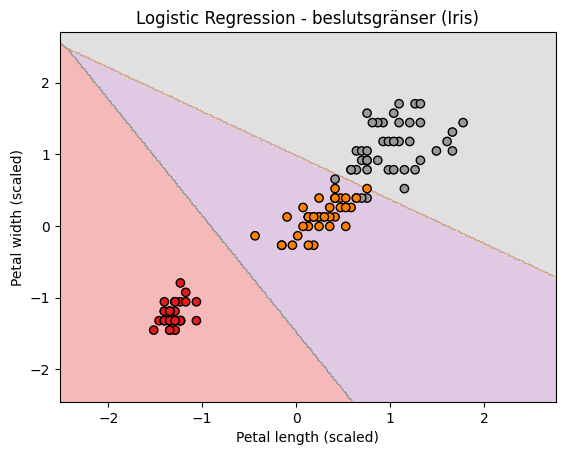

In [9]:
#Visualisering av beslutsgränser för Logistic Regression. (Kod från chatGPT bara för att testa visualisering av datan!)


import matplotlib.pyplot as plt
import numpy as np

# Välj ut två features (kolumnindex 2 och 3 = petal length & width)
X_train_2d = X_train.iloc[:, [2, 3]]
X_test_2d = X_test.iloc[:, [2, 3]]

# Skala dessa två features
scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled = scaler_2d.transform(X_test_2d)

# Träna en ny Logistic Regression på dessa 2 features
log_reg_2d = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=200, random_state=42)
log_reg_2d.fit(X_train_2d_scaled, y_train)

# Skapa meshgrid för att plotta beslutsgränser
x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = log_reg_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotta beslutsgränser
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)

# Plotta träningspunkterna
plt.scatter(X_train_2d_scaled[:, 0], X_train_2d_scaled[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.Set1)
plt.xlabel("Petal length (scaled)")
plt.ylabel("Petal width (scaled)")
plt.title("Logistic Regression - beslutsgränser (Iris)")
plt.show()
